**dam-pml02-tut.ipynb**: This Jupyter notebook is provided by Joachim Vogt for the *Python Modeling Lab* of the module *CO-710 Data Analytics and Modeling* offered in Fall 2024 at Constructor University. Jupyter notebooks and other learning resources are available from a dedicated *module platform*.

# Statistical distributions in Python

This tutorial introduces Python tools for displaying empirical statistical distributions and their theoretical counterparts. Follow the instructions below to learn to

- [ ] generate sequences of random numbers using the NumPy module `random`,
- [ ] construct and display empirical distributions in the form of histograms,
- [ ] approximate probability density functions using kernel density estimators,
- [ ] apply important methods of the SciPy module `stats`,
- [ ] visualize empirical bivariate distributions using functions of the seaborn module.

If you wish to keep track of your progress, you may edit this markdown cell, check a box in the list above after having worked through the respective part of this notebook, and save the file.

*Short exercises* are embedded in this notebook. *Sample solutions* can be found at the end of the document.

## Preparation

Run the following code cell to import standard Python data science libraries. The NumPy module facilitates efficient processing of numerical arrays. From the matplotlib library we import the package `pyplot`. The magic command `%matplotlib inline` (IPython shell) allows for inline display of graphics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Additional graphical tools for visualizing statistical distributions are provided by the [seaborn library](https://seaborn.pydata.org/).

In [2]:
import seaborn as sns
### the following two lines suppress a certain type of future warnings in seaborn
import warnings
warnings.filterwarnings(action="ignore", message="use_inf_as_na", category=FutureWarning)

The following data file is expected to reside in the working directory. Identify the file on the module platform and upload it to the same folder as this Jupyter notebook.

- `imf_5min_20170101-20170331.txt`: 5-minute averaged components $B_x,B_y,B_z$ of the interplanetary magnetic field (IMF) in Geocentric Solar Ecliptic (GSE) coordinates from the first three months of the year 2017. The file was created using 
[NASA's OMNIWeb interface](https://omniweb.gsfc.nasa.gov/form/omni_min.html). Time stamps and flagged data (value 9999.99) were removed so that the file can be efficiently loaded using the NumPy function `loadtxt()`.

## Pseudo-random number generators

In statistical data analysis and modeling, pseudo-random number generators are frequently used, e.g., to study statistical operations by means of synthetic measurements (also called surrogate data) drawn from a given distribution. Two important distributions considered here are the uniform distribution and the normal (Gaussian) distribution. Before we look at how they are implemented in Python, let us review a few theoretical concepts.

### Random variables and statistical distributions

Recall that measurements and their errors are modeled by *random processes*, and their outcomes by random variables. For *continuous random variables*, probabilities do not refer to single values but to ranges of values. With the probability to find a continuous random variable $U$ in the range $[a,b]$ denoted as $\mathrm{Prob} (a \le U \le b)$, the *cumulative distribution function (CDF)* $\Phi$ is defined through 
$$
\Phi (u) = \mathrm{Prob} (U \le u) ~,
$$
i.e., it is the probability that the random variable $U$ assumes a value smaller than or equal to the number $u$.

If the cumulative distribution function $\Phi = \Phi(u)$ is a smooth (differentiable) function, then its derivative
$$
p(u) \; = \; \frac{\mathrm{d} \Phi}{\mathrm{d} u} \, = \, \Phi'(u) 
$$
is called *probability density function (PDF)*, but also density, distribution function, or simply distribution.

- The PDF is *non-negative*: $p(u) \ge 0$.
- $\mathrm{Prob} (a \le U \le b) \, = \, \Phi(b) - \Phi(a) \, = \, \int_a^b p(u) \, \mathrm{d} u ~.$
- *Normalization*: $\int_{-\infty}^{\infty} p(u) \, \mathrm{d} u \, = \, 1 ~.$

*Quantiles* divide the range of a distribution into intervals of equal probability, and are obtained as solutions $u$ of $\Phi(u) = q$ with predefined probabilities $q$, thus $u = \Phi^{-1}(q)$. The *quantile function* or *percent point function (PPF)* is the inverse of the CDF.

### Normal distribution

The normal distribution is characterized by two parameters, namely, the mean $u_0$ and the standard deviation $\sigma$. Its PDF is given by
$$
p(u) \, = \, \frac{1}{\sqrt{2\pi\sigma^2}} e^{-(u - u_0)^2/2\sigma^2} ~.
$$
The function `normal()` from the NumPy module `random` generates (pseudo-)random numbers according to the normal distribution, with the mean $u_0$ and the standard deviation $\sigma$ defined through the keyword parameters `loc` and `scale`. A third keyword parameter `size` allows for specifying the length of the shape of the output array.

In [3]:
print(np.random.normal(loc=10, scale=10, size=(2, 5)))

[[17.47616468 16.59084368 12.80670208 20.49419526  6.54905963]
 [30.44430746 22.84010453  0.19461459  7.46819606  8.76549364]]


The standard normal distribution has zero mean and unit variance:
$$
p(u) \, = \, \frac{1}{\sqrt{2\pi}} e^{-u^2/2} ~.
$$
Random numbers according to the standard normal distribution are generated conveniently by means of the functions `standard_normal()` or `randn()`, also from the NumPy module `random`.

In [4]:
print(np.random.standard_normal(5))
print(np.random.randn(5))

[-0.1491416  -0.72754234  0.34357065 -0.59578455  0.43659075]
[-1.05263525 -1.04108827  0.73308437  0.39910783 -0.58488136]


### Uniform distribution

Uniform distributions are non-zero and constant in an interval $[a,b]$, and zero otherwise:
$$
p(u) \, = \, 
\left\{ 
\begin{array}{ccl} 
\frac{1}{b-a} & \text{if} & u \in [a,b] ~, \\
0             & \text{if} & u \notin [a,b] ~.
\end{array}
\right.
$$
The function `uniform()` from the NumPy module `random` generates uniform random numbers with the keyword parameters `low` and `high` set to $a$ and $b$, respectively.

In [5]:
print(np.random.uniform(low=10, high=20, size=(2, 5)))

[[10.65304731 14.27656809 14.79929009 14.8524343  18.93335455]
 [17.0799126  13.1559651  19.05741854 15.46153188 16.70886723]]


The standard uniform distribution yields values in the interval $[a,b] = [0,1]$. Random number generators from the NumPy module `random` for this distribution are `random()`, `random_sample()`, and `rand()`.

In [6]:
print(np.random.random(5))
print(np.random.random_sample(5))
print(np.random.rand(5))

[0.24581575 0.20966735 0.17870049 0.05023231 0.61407039]
[0.48833964 0.17648841 0.8093474  0.98892536 0.31651729]
[0.09566287 0.13666434 0.36287219 0.55546751 0.054921  ]


### Generator instance and seed values

While functions for random number generation can be called in the usual manner as demonstrated above, it is recommended to create random numbers from an instance of a Generator class produced by the constructor function `default_rng()`.

In [7]:
rng = np.random.default_rng()
print(rng.random(5))
print(rng.standard_normal(5))

[0.19470221 0.97895238 0.99239666 0.46151103 0.95045933]
[-0.94685536 -0.11315339 -0.54400066  0.30331515  0.84637077]


The function `default_rng()` accepts a seed parameter to initialize the random number sequence to a controlled state. The same random number sequence may be reproduced for test purposes, as one can see by repeatedly running the following cell.

In [8]:
seed = 42
rng = np.random.default_rng(seed)
rng.random(5)

array([0.77395605, 0.43887844, 0.85859792, 0.69736803, 0.09417735])

## Density estimation

An empirical distribution constructed from the data is a statistical estimator for the PDF of the underlying random process. The procedure of constructing such an empirical distribution is called *density estimation*. A simple and popular density estimator is the *histogram*, collecting data into predefined intervals called *bins*. The resulting occurence frequencies are plotted as a step function using the `hist()` method from `matplotlib.pyplot`. The keyword `density` normalizes the output so that it can be graphically compared to the theoretical PDF. The keyword `bins` gives the number of intervals and thus controls the resolution of the histogram.

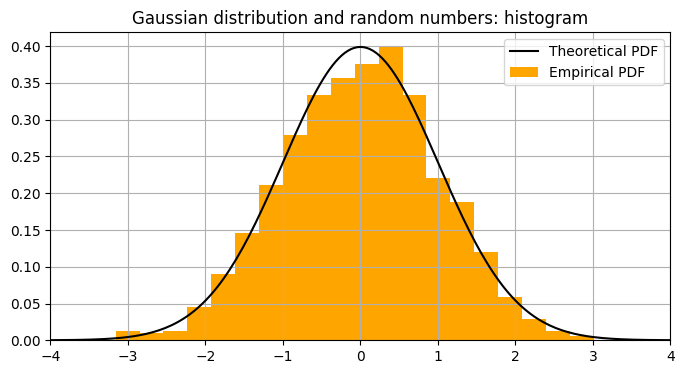

In [10]:
rng = np.random.default_rng(99)
u = rng.standard_normal(1000)
x = np.linspace(-4, 4, 201)
d = np.exp(-x**2/2) / np.sqrt(2*np.pi)
plt.figure(figsize=(8, 4))
plt.plot(x, d, label='Theoretical PDF', color='black')
plt.hist(u, bins=20, density=True, label='Empirical PDF', color='orange')
plt.title('Gaussian distribution and random numbers: histogram')
plt.xlim((-4, 4))
plt.grid()
plt.legend();

More refined than histograms are *kernel density estimators (KDEs)* which acculumate contributions from predefined functions (kernels) around the data. KDE implementations exist in several Python packages. Here we choose ``kdeplot()`` from the seaborn module. The type of kernel and the resolution can be controlled by means of the keywords `kernel` and `bw`, respectively. See the documentation for details.

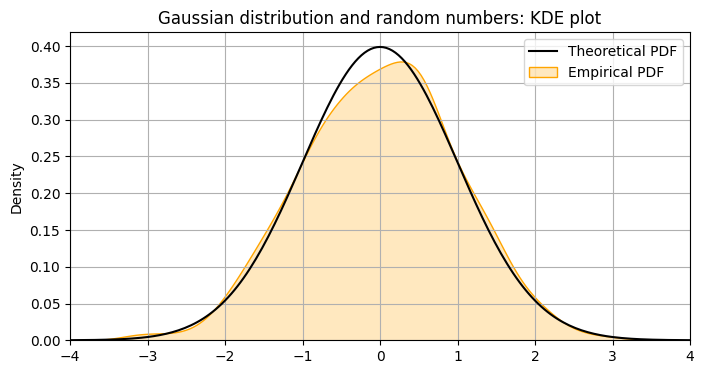

In [9]:
rng = np.random.default_rng(99)
u = rng.standard_normal(1000)
x = np.linspace(-4, 4, 201)
d = np.exp(-x**2/2) / np.sqrt(2*np.pi)
plt.figure(figsize=(8, 4))
plt.plot(x, d, label='Theoretical PDF', color='black')
sns.kdeplot(u, fill=True, label='Empirical PDF', color='orange')
plt.title('Gaussian distribution and random numbers: KDE plot')
plt.xlim((-4, 4))
plt.grid()
plt.legend();

### Exercise: Density estimation

Using the same parameters as for the standard normal distribution example, create a set of random numbers following the standard uniform distribution, then a histogram plot and a KDE plot.

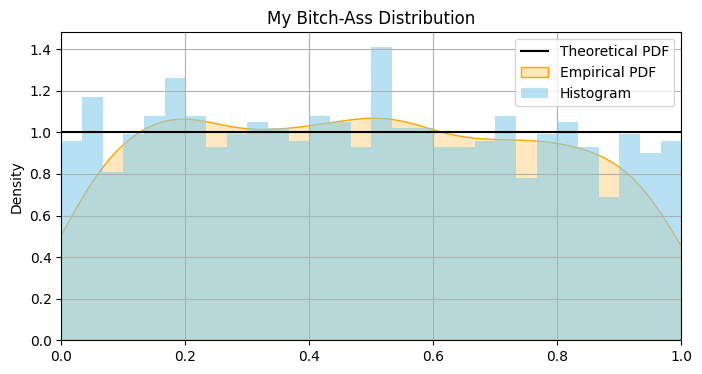

In [23]:
rng = np.random.default_rng(1000)
u= rng.random(1000)
x = np.linspace(0,1,201)
d= np.ones_like(x)
plt.figure(figsize=(8, 4))
plt.plot(x, d, label='Theoretical PDF', color='black')
sns.kdeplot(u, fill=True, label='Empirical PDF', color='orange')
plt.hist(u, bins=30, density=True, alpha=0.6, color='skyblue', label='Histogram')
plt.title('My Bitch-Ass Distribution')
plt.xlim((0,1))
plt.grid()
plt.legend();

## Random variables as provided by `scipy.stats`

The SciPy module `stats` provides an environment for working with random variables. Consult the [user guide](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) and the 
[reference manual](https://docs.scipy.org/doc/scipy/reference/reference/stats.html#statsrefmanual) for an introduction to the module.

In [26]:
from scipy import stats

### Example: Uniform distribution in `scipy.stats`

To demonstrate the attributes and methods associated with the continuous random variables class in the SciPy module `stats`, consider the uniform distribution on an interval $[a,b]$ as implemented in `scipy.stats.uniform()`. The keyword arguments `loc` and `scale` correspond to the startpoint $a$ and the interval length $b-a$, respectively. To obtain an overview of further parameters and methods associated with `scipy.stats.uniform()`, uncomment the line in the cell below.

In [27]:
stats.uniform?

Signature:       stats.uniform(*args, **kwds)
Type:            uniform_gen
String form:     <scipy.stats._continuous_distns.uniform_gen object at 0x7f2198b6b890>
File:            ~/my-jupyter-env/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py
Docstring:      
A uniform continuous random variable.

In the standard form, the distribution is uniform on ``[0, 1]``. Using
the parameters ``loc`` and ``scale``, one obtains the uniform distribution
on ``[loc, loc + scale]``.

As an instance of the `rv_continuous` class, `uniform` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, loc=0, scale=1)
    Probability density function.
logpdf(x, loc=0, scale=1)
    Log of the probability density function.
cdf(x, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, loc=0, sca

For instance, the support and basic statistics for the default case (default parameters `loc=0` and `scale=1`, support $[0,1]$) can be obtained directly from the corresponding methods.

In [29]:
print('Support:', stats.uniform.support())
m, v, s, k = stats.uniform.stats(moments='mvsk')
print('Moments: m={:.2f}, v={:.4f}, s={:.2f}, k={:.3f}'.format(m, v, s, k))

Support: (np.float64(0.0), np.float64(1.0))
Moments: m=0.50, v=0.0833, s=0.00, k=-1.200


Alternatively, one may first create a so-called *frozen* (continuous) random variable, and then call suitable methods to compute statistics. This approach is exemplified below, using a shifted (`loc=-1`) and stretched (`scale=2`) version of the standard uniform distribution.

In [31]:
### Uniform distribution on [0, 1]
print('Uniform distribution on [0, 1]')
urv1 = stats.uniform()
print('* Support:', urv1.support())
m, v, s, k = urv1.stats(moments='mvsk')
print('* Moments: m={:.2f}, v={:.4f}, s={:.2f}, k={:.3f}'.format(m, v, s, k))
print()
### Uniform distribution on [-1, 1]
print('Uniform distribution on [-1, 1]')
uloc = -1
usca = 2
urv2 = stats.uniform(loc=uloc, scale=usca)
print('* Support:', urv2.support())
m, v, s, k = urv2.stats(moments='mvsk')
print('* Moments: m={:.2f}, v={:.4f}, s={:.2f}, k={:.3f}'.format(m, v, s, k))

Uniform distribution on [0, 1]
* Support: (np.float64(0.0), np.float64(1.0))
* Moments: m=0.50, v=0.0833, s=0.00, k=-1.200

Uniform distribution on [-1, 1]
* Support: (np.float64(-1.0), np.float64(1.0))
* Moments: m=0.00, v=0.3333, s=0.00, k=-1.200


Display the probability density functions (PDFs) for both cases.

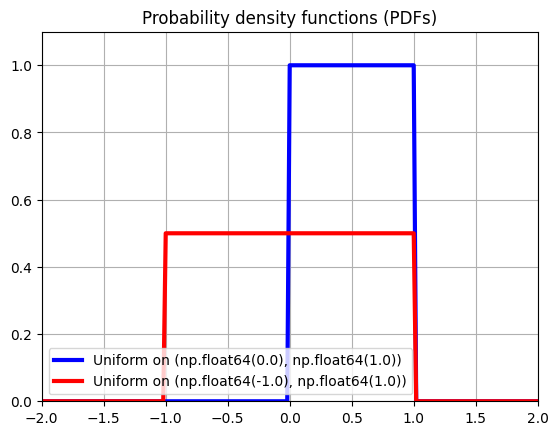

In [32]:
x = np.linspace(-2, 2, 201)
plt.title('Probability density functions (PDFs)')
plt.plot(x, urv1.pdf(x), 'b-', lw=3, label='Uniform on {}'.format(urv1.support()))
plt.plot(x, urv2.pdf(x), 'r-', lw=3, label='Uniform on {}'.format(urv2.support()))
plt.xlim([-2, 2])
plt.ylim([0.0, 1.1])
plt.legend()
plt.grid()

Display the cumulative distribution functions (CDFs) for both cases.

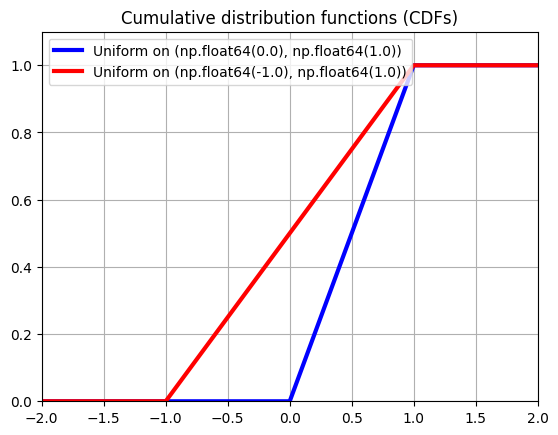

In [33]:
x = np.linspace(-2, 2, 201)
plt.title('Cumulative distribution functions (CDFs)')
plt.plot(x, urv1.cdf(x), 'b-', lw=3, label='Uniform on {}'.format(urv1.support()))
plt.plot(x, urv2.cdf(x), 'r-', lw=3, label='Uniform on {}'.format(urv2.support()))
plt.xlim([-2, 2])
plt.ylim([0.0, 1.1])
plt.legend()
plt.grid()

Display the percent point functions (PPFs) for both cases.

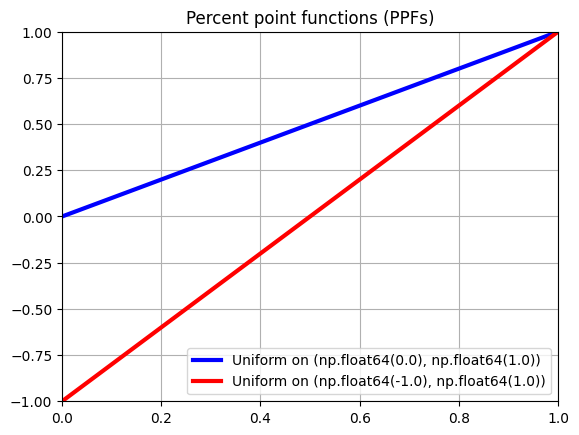

In [34]:
q = np.linspace(0, 1, 201)
plt.title('Percent point functions (PPFs)')
plt.plot(q, urv1.ppf(q), 'b-', lw=3, label='Uniform on {}'.format(urv1.support()))
plt.plot(q, urv2.ppf(q), 'r-', lw=3, label='Uniform on {}'.format(urv2.support()))
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.legend()
plt.grid()

### Exercise: Normal distribution in `scipy.stats`

Consider the standard normal distribution and repeat the sequence of steps from the previous example.

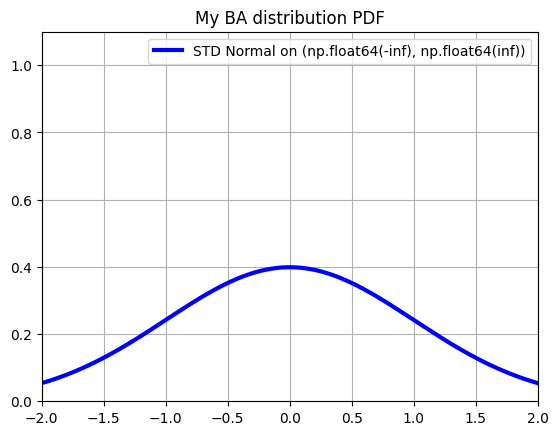

In [38]:
snrv = stats.norm(loc=0,scale=1)
x=np.linspace(-2,2,201)
plt.title("My BA distribution PDF")
plt.plot(x, snrv.pdf(x), 'b-', lw=3, label ='STD Normal on {}'.format(snrv.support()))
plt.xlim([-2,2])
plt.ylim([0.0,1.1])
plt.legend()
plt.grid()

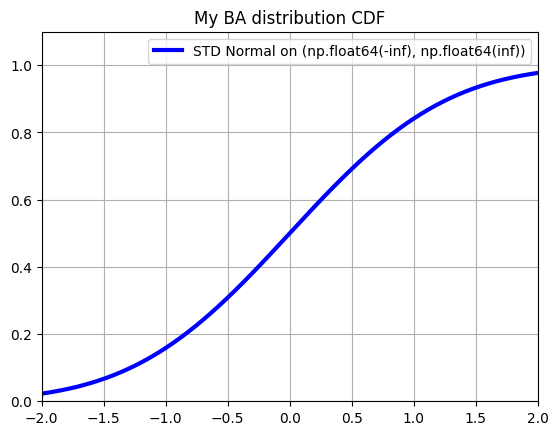

In [47]:
snrv = stats.norm(loc=0,scale=1)
x=np.linspace(-2,2,201)
plt.title("My BA distribution CDF")
plt.plot(x, snrv.cdf(x), 'b-', lw=3, label ='STD Normal on {}'.format(snrv.support()))
plt.xlim([-2,2])
plt.ylim([0.0,1.1])
plt.legend()
plt.grid()

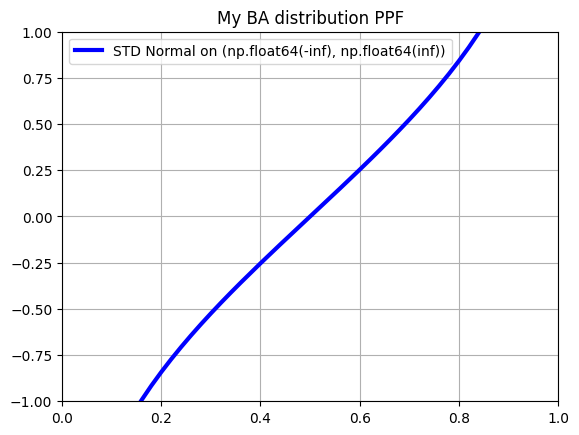

In [48]:
snrv = stats.norm(loc=0,scale=1)
x=np.linspace(-2,2,201)
plt.title("My BA distribution PPF")
plt.plot(x, snrv.ppf(x), 'b-', lw=3, label ='STD Normal on {}'.format(snrv.support()))
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.legend()
plt.grid()

### Random number generation in `scipy.stats`

In `scipy.stats` terminology, random numbers are referred to as random variates, and generated by means of the method `rvs()`. In the cell below, a sequence of uniformly distributed random numbers is created. The resulting histogram is displayed against the PDF.

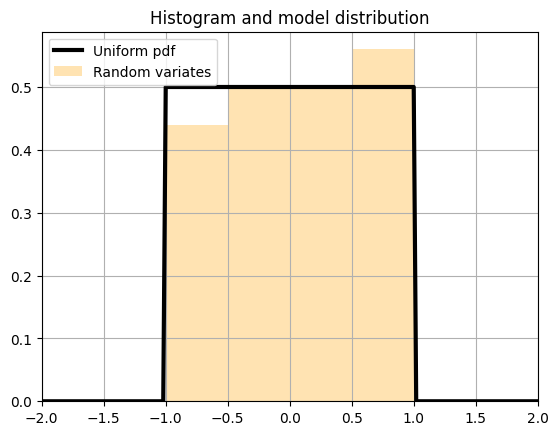

In [50]:
x = np.linspace(-2, 2, 201)
plt.title('Histogram and model distribution')
plt.plot(x, urv2.pdf(x), lw=3, label='Uniform pdf', color='black')
data = urv2.rvs(size=100)
bins = np.linspace(-1, 1, 5)
plt.hist(data, bins=bins, color='orange',\
         alpha=0.3, density=True, label='Random variates')
plt.xlim([-2, 2])
plt.legend()
plt.grid()

Interpreting the set of random variates as input data, one can fit the parameters of the uniform distribution.

In [52]:
loc_est, scale_est = stats.uniform.fit(data)
print('Estimated location (lower bound of uniform distr.) :', loc_est)
print('Estimated scale (upper bound minus lower bound)   :', scale_est)

Estimated location (lower bound of uniform distr.) : -0.9758284008127145
Estimated scale (upper bound minus lower bound)   : 1.9381870371141015


### Exercise: Reproducible random number sequences in `scipy.stats`

Initiatizing random number sequences in a reproducible manner is possible also in `scipy.stats`. Consult the documentation on `RandomState` and `Generator` objects in NumPy, and how to import the information in `scipy.stats`. 

## Bivariate distributions

Consider two continuous random variables $U$ and $V$, then
$\mathrm{Prob} ( a \le U \le b , c \le V \le d)$
is the probability to find $U$ in $[a,b]$ and (simultaneously) $V$ in $[c,d]$. 
The *joint cumulative distribution function (joint CDF)* $\Phi = \Phi (u,v)$ 
and the 
*joint probability density function (joint PDF)* $p = p(u,v)$ 
are related through
$$
\Phi (u,v) \; = \; \mathrm{Prob} ( U \le u , V \le v ) \; = \;
\int_{-\infty}^u \int_{-\infty}^v p (\tilde u , \tilde v) 
\, \mathrm{d} \tilde u \, \mathrm{d} \tilde v ~.
$$

The two random variables are *statistically independent* if the joint PDF factorizes, i.e., if $p(u,v) = p_u (u) \cdot p_v (v)$, and then also $\Phi (u,v) = \Phi_u (u) \cdot \Phi_v (v)$.

*Marginal densities*: 
$p_u (u) = \int p(u,v) \, \mathrm{d} v$ and 
$p_v (v) = \int p(u,v) \, \mathrm{d} u$.

### Visualization of bivariate data

The simplest way to visualize empiricial distributions of bivariate data are scatter plots. The density of the point cloud gives and impression of the associated joint PDF.

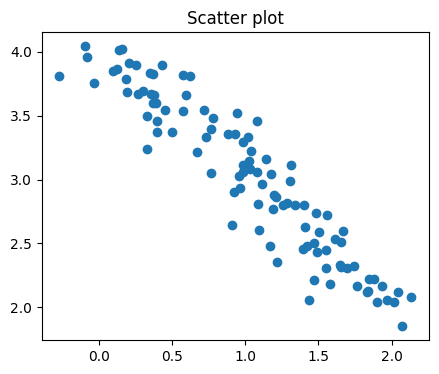

In [53]:
ndata = 101
t = np.linspace(-1, 1, ndata)
x = 1 + t + 0.2*np.random.randn(ndata)
y = 3 - t + 0.1*np.random.randn(ndata)
plt.figure(figsize=(5, 4))
plt.scatter(x, y)
plt.title('Scatter plot');

For large sample sizes, bivariate histograms are more suitable. To obtain an estimate of the joint PDF with the function `histplot()` of the seaborn package, set the keyword `stat` to `'density'`.

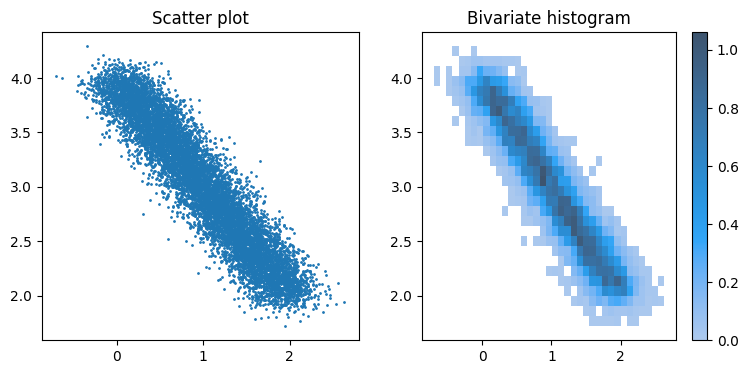

In [54]:
ndata = 10001
t = np.linspace(-1, 1, ndata)
x = 1 + t + 0.2*np.random.randn(ndata)
y = 3 - t + 0.1*np.random.randn(ndata)
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
plt.scatter(x, y, s=1)
plt.title('Scatter plot')
plt.subplot(1, 2, 2)
plt.title('Bivariate histogram')
sns.histplot(x=x, y=y, cbar=True, stat='density');

As in the univariate case, kernel density estimates of bivariate data can be displayed by means of the seaborn function `kdeplot()`.

### Example: Bivariate distributions of solar wind variables

On the module platform you find the three-column data file `imf_5min_20170101-20170331.txt` with 5-minute averaged components $B_x,B_y,B_z$ of the interplanetary magnetic field (IMF) in Geocentric Solar Ecliptic (GSE) coordinates from the first three months of the year 2017. The file was created using 
[NASA's OMNIWeb interface](https://omniweb.gsfc.nasa.gov/form/omni_min.html). Time stamps and flagged data (value 9999.99) were removed so that the file can be efficiently loaded using the NumPy function `loadtxt()`. Using the seaborn function `jointplot()`, we produce diagrams combining univariate and bivariate histograms, first for the pair of IMF components $B_y$ and $B_z$.

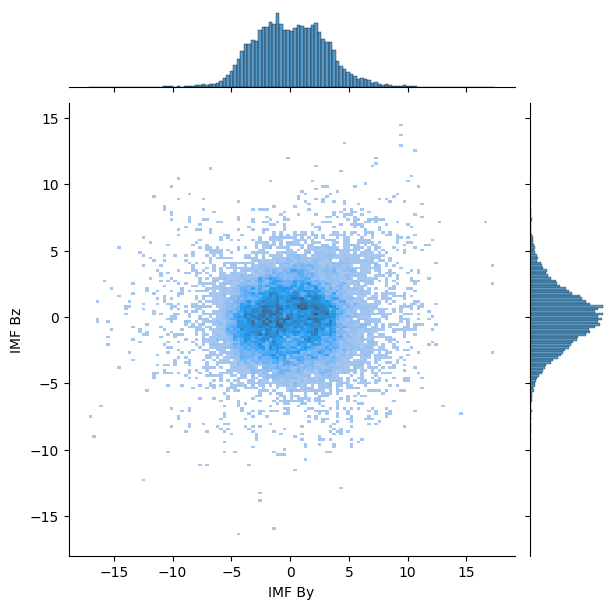

In [55]:
Bx,By,Bz = np.loadtxt('imf_5min_20170101-20170331.txt', unpack=True)
sns.jointplot(x=By, y=Bz, kind='hist')
plt.xlabel('IMF By')
plt.ylabel('IMF Bz');

A bivariate histogram is produced and combined with univariate histograms also for the pair $(B_y,B_x)$.

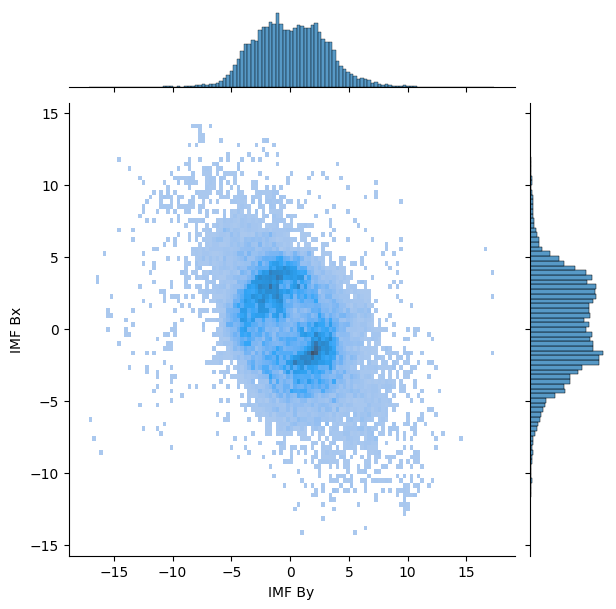

In [56]:
sns.jointplot(x=By, y=Bx, kind='hist')
plt.xlabel('IMF By')
plt.ylabel('IMF Bx');

The bivariate histograms show that positive/negative $B_y$ cluster with negative/positive $B_x$ (non-linear anti-correlation) whereas there is no clear indication of a statistical association between $B_y$ and $B_z$.

### Exercise: `seaborn` documentation with built-in data set `penguins`

Consult the [documentation](https://seaborn.pydata.org/tutorial/distributions.html) of the `seaborn.distributions` package for further information on multivariate data visualization. Study the examples using the built-in `penguins` data set. 

---
---

## Solutions

### Solution: Density estimation

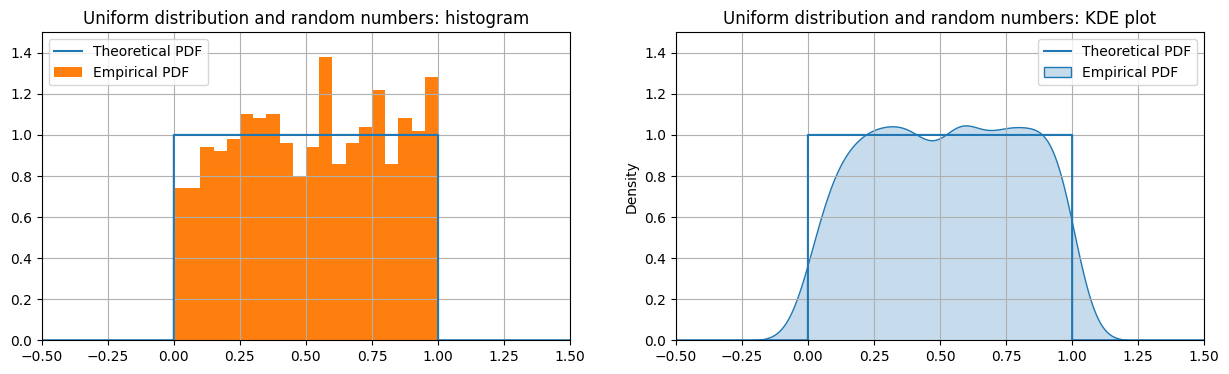

In [57]:
rng = np.random.default_rng(99)
u = rng.random(1000)
x = np.array([-0.5, -0.0001, 0.0, 1.0, 1.0001, 1.5])
d = np.ones_like(x)
d[x<0] = 0
d[x>1] = 0
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(x, d, label='Theoretical PDF')
plt.hist(u, bins=20, density=True, label='Empirical PDF')
plt.title('Uniform distribution and random numbers: histogram')
plt.xlim((-0.5, 1.5))
plt.ylim((0.0, 1.5))
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(x, d, label='Theoretical PDF')
sns.kdeplot(u, fill=True, label='Empirical PDF')
plt.title('Uniform distribution and random numbers: KDE plot')
plt.xlim((-0.5, 1.5))
plt.ylim((0.0, 1.5))
plt.legend()
plt.grid()

### Solution: Normal distribution in `scipy.stats`

In [58]:
### Standard normal distribution
print('Normal distribution: mean=0, std=1')
nrv1 = stats.norm()
print('* Support:', nrv1.support())
m, v, s, k = nrv1.stats(moments='mvsk')
print('* Moments: m={:.2f}, v={:.4f}, s={:.2f}, k={:.3f}'.format(m, v, s, k))
print()
### Normal distribution with 
print('Normal distribution: mean=-1, std=2')
uloc = -1
usca = 2
nrv2 = stats.norm(loc=uloc, scale=usca)
print('* Support:', nrv2.support())
m, v, s, k = nrv2.stats(moments='mvsk')
print('* Moments: m={:.2f}, v={:.4f}, s={:.2f}, k={:.3f}'.format(m, v, s, k))

Normal distribution: mean=0, std=1
* Support: (np.float64(-inf), np.float64(inf))
* Moments: m=0.00, v=1.0000, s=0.00, k=0.000

Normal distribution: mean=-1, std=2
* Support: (np.float64(-inf), np.float64(inf))
* Moments: m=-1.00, v=4.0000, s=0.00, k=0.000


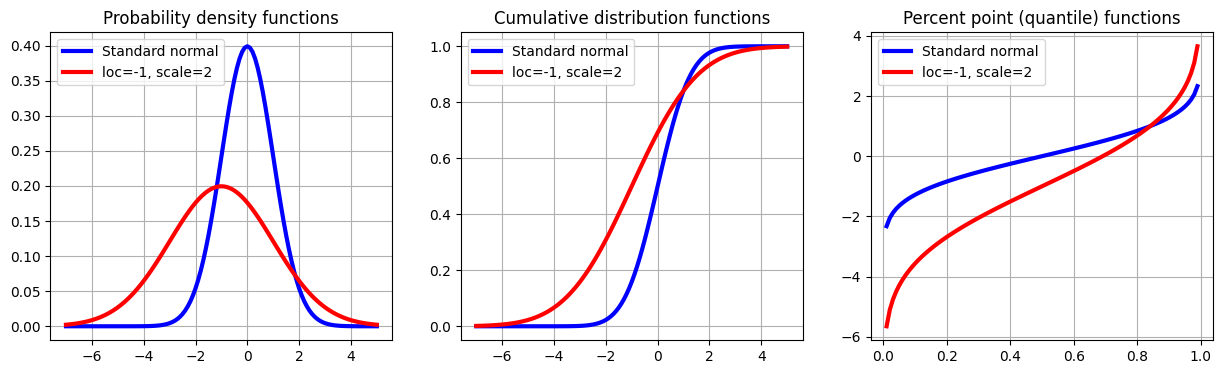

In [59]:
x = np.linspace(-7, 5, 121)
plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.title('Probability density functions')
plt.plot(x, nrv1.pdf(x), 'b-', lw=3, label='Standard normal')
plt.plot(x, nrv2.pdf(x), 'r-', lw=3, label='loc={:}, scale={:}'.format(uloc, usca))
plt.legend()
plt.grid()
plt.subplot(132)
plt.title('Cumulative distribution functions')
plt.plot(x, nrv1.cdf(x), 'b-', lw=3, label='Standard normal')
plt.plot(x, nrv2.cdf(x), 'r-', lw=3, label='loc={:}, scale={:}'.format(uloc, usca))
plt.legend()
plt.grid()
plt.subplot(133)
q = np.linspace(0, 1, 101)
plt.title('Percent point (quantile) functions')
plt.plot(q, nrv1.ppf(q), 'b-', lw=3, label='Standard normal')
plt.plot(q, nrv2.ppf(q), 'r-', lw=3, label='loc={:}, scale={:}'.format(uloc, usca))
plt.legend()
plt.grid()

---
---